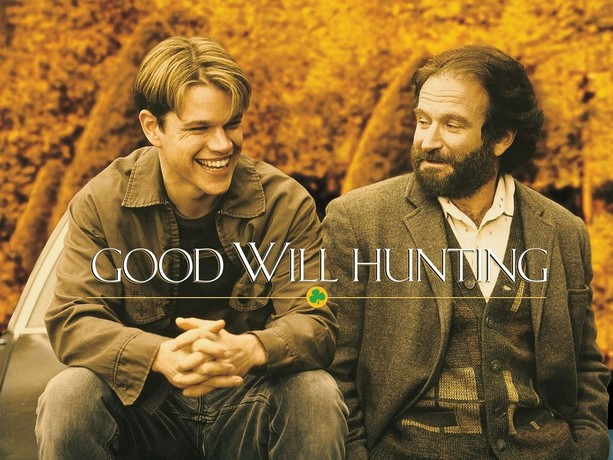

# Uploading Need Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display
from sklearn.metrics.pairwise import linear_kernel # Using linear_kernel for simplicity in this case
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

# Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/letterboxd-movies-dataset/letterboxd_movies_dataset.csv')

# EDA (Exploratory Data Analysis) & Visualization

In [3]:
df.head()

,title,year,decade,decade_category,movie_era,age_years,age_category,runtime,runtime_category,runtime_percentile,...,language,is_english,title_length,title_complexity,word_count,title_runtime_ratio,runtime_efficiency,production_scale,is_recent,is_classic
0,Parasite,2019.0,2010,2010s,Contemporary,6.0,Recent,133.0,Long,P90,...,Korean,False,8,Short,1,0.060150,Balanced,Independent,False,False
1,Barbie,2023.0,2020,2020s,Contemporary,2.0,Brand_New,114.0,Standard,P80,...,English,True,6,Short,1,0.052632,Balanced,Independent,True,False
2,Interstellar,2014.0,2010,2010s,Contemporary,11.0,Recent,169.0,Long,P100,...,English,True,12,Medium,1,0.071006,Balanced,Commercial,False,False
3,Fight Club,1999.0,1990,1990s,Modern,26.0,Modern,139.0,Long,P100,...,English,True,10,Short,2,0.071942,Balanced,Commercial,False,False
4,La La Land,2016.0,2010,2010s,Contemporary,9.0,Recent,129.0,Long,P90,...,English,True,10,Short,3,0.077519,Balanced,Commercial,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16246 entries, 0 to 16245
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                16246 non-null  object 
 1   year                 16246 non-null  float64
 2   decade               16246 non-null  int64  
 3   decade_category      16246 non-null  object 
 4   movie_era            16246 non-null  object 
 5   age_years            16246 non-null  float64
 6   age_category         15835 non-null  object 
 7   runtime              16210 non-null  float64
 8   runtime_category     16210 non-null  object 
 9   runtime_percentile   16246 non-null  object 
 10  is_feature_length    16246 non-null  bool   
 11  genres               15084 non-null  object 
 12  primary_genre        15084 non-null  object 
 13  genre_count          16246 non-null  float64
 14  genre_diversity      15084 non-null  object 
 15  is_single_genre      16246 non-null 

In [5]:
df.describe()

,year,decade,age_years,runtime,genre_count,title_length,word_count,title_runtime_ratio
count,16246.000000,16246.000000,16246.000000,16210.000000,16246.000000,16246.000000,16246.000000,16246.000000
mean,2001.428105,1997.067586,23.571895,108.466872,2.118675,16.047950,2.890127,0.248055
std,22.436123,22.730641,22.436123,51.348614,0.971594,9.178935,1.734286,0.965472
min,1888.000000,1880.000000,-4.000000,1.000000,0.000000,1.000000,1.000000,0.007130
25%,1990.000000,1990.000000,6.000000,91.000000,1.000000,10.000000,2.000000,0.088889
50%,2009.000000,2000.000000,16.000000,102.000000,2.000000,14.000000,2.000000,0.134021
75%,2019.000000,2010.000000,35.000000,117.000000,3.000000,20.000000,4.000000,0.206522
max,2029.000000,2020.000000,137.000000,600.000000,3.000000,85.000000,15.000000,37.000000


In [6]:
categorical_cols_fill_unknown = ['primary_genre','country','runtime_category','genres']
for col in categorical_cols_fill_unknown:
    df[col].fillna('Unknown',inplace=True)

categorical_cols_fill_mode = ['age_category','language']
for col in categorical_cols_fill_mode:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent,inplace=True)

if df['runtime'].isnull().sum()>0:
    runtime_median = df['runtime'].median()
    df['runtime'].fillna(runtime_median , inplace=True)

df['genre_diversity'].fillna(0,inplace=True)

/tmp/ipykernel_19/554371326.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown',inplace=True)
/tmp/ipykernel_19/554371326.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16246 entries, 0 to 16245
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                16246 non-null  object 
 1   year                 16246 non-null  float64
 2   decade               16246 non-null  int64  
 3   decade_category      16246 non-null  object 
 4   movie_era            16246 non-null  object 
 5   age_years            16246 non-null  float64
 6   age_category         16246 non-null  object 
 7   runtime              16246 non-null  float64
 8   runtime_category     16246 non-null  object 
 9   runtime_percentile   16246 non-null  object 
 10  is_feature_length    16246 non-null  bool   
 11  genres               16246 non-null  object 
 12  primary_genre        16246 non-null  object 
 13  genre_count          16246 non-null  float64
 14  genre_diversity      16246 non-null  object 
 15  is_single_genre      16246 non-null 

primary_genre
Comedy             2934
Romance            1669
Thriller           1515
Horror             1240
Unknown            1162
Crime              1096
Action              912
Documentary         687
Science Fiction     611
Fantasy             593
Name: count, dtype: int64


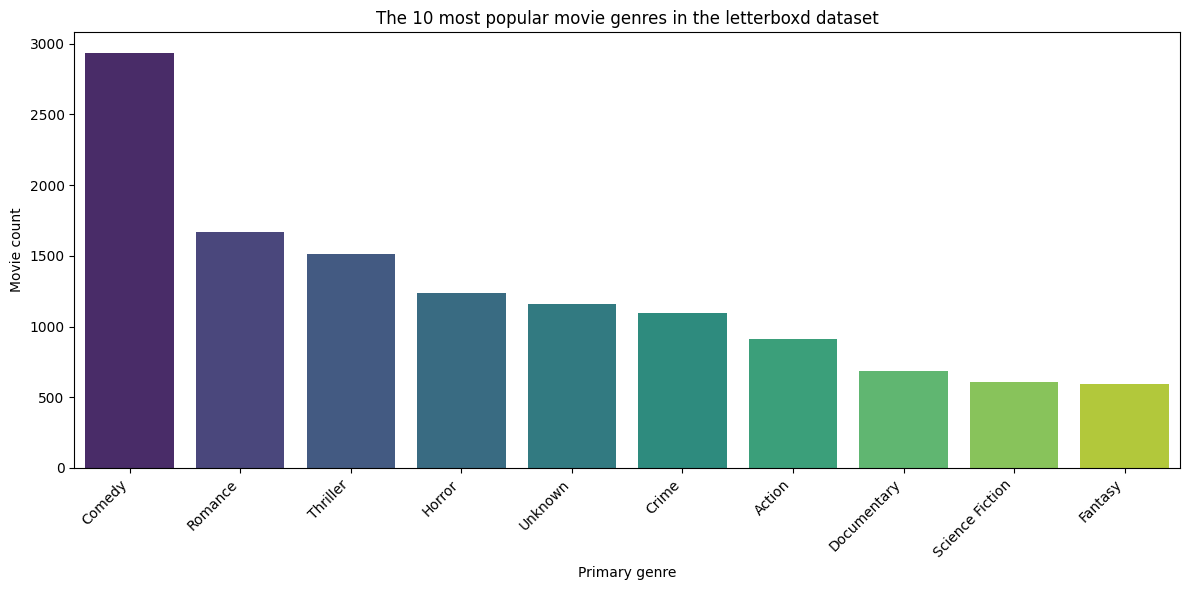

In [8]:
# Most popular genres

genre_counts = df['primary_genre'].value_counts()
print(genre_counts.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index[:10],y=genre_counts.values[:10],palette="viridis")
plt.title('The 10 most popular movie genres in the letterboxd dataset')
plt.xlabel("Primary genre")
plt.ylabel("Movie count")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

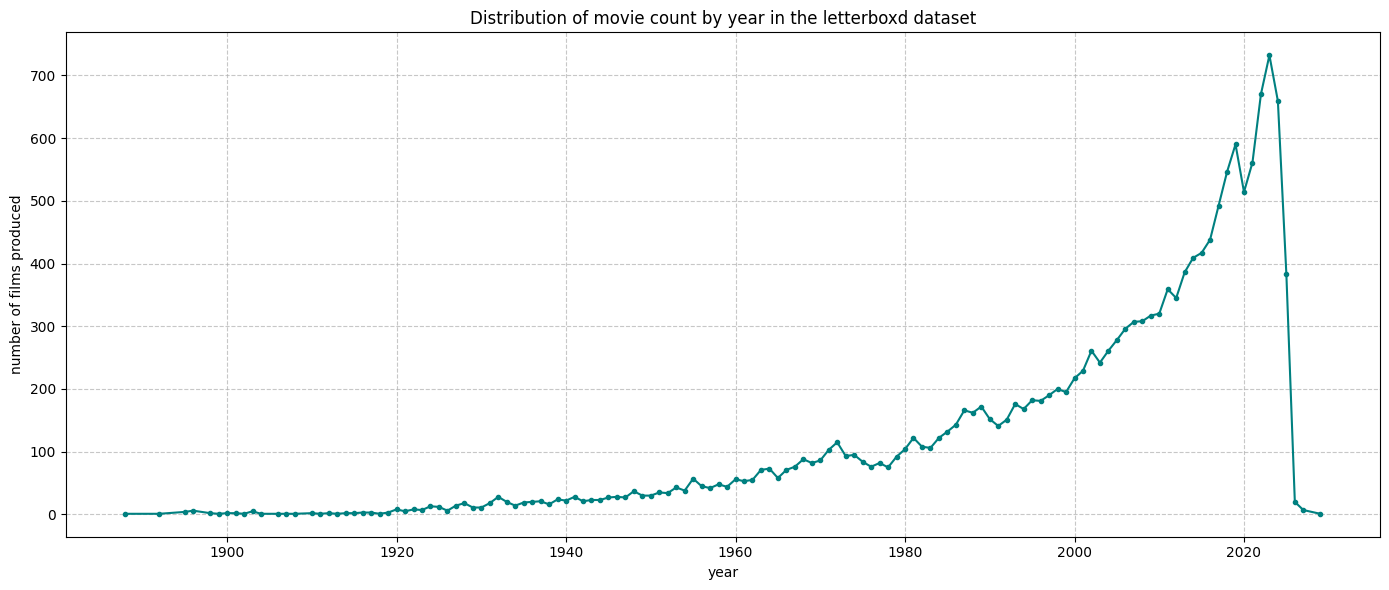

In [9]:
# Calculating the number of films per year

films_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
films_by_year.plot(kind="line",marker="o",markersize=3,color="teal")
plt.title("Distribution of movie count by year in the letterboxd dataset")
plt.xlabel("year")
plt.ylabel("number of films produced")
plt.grid(True,linestyle="--",alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


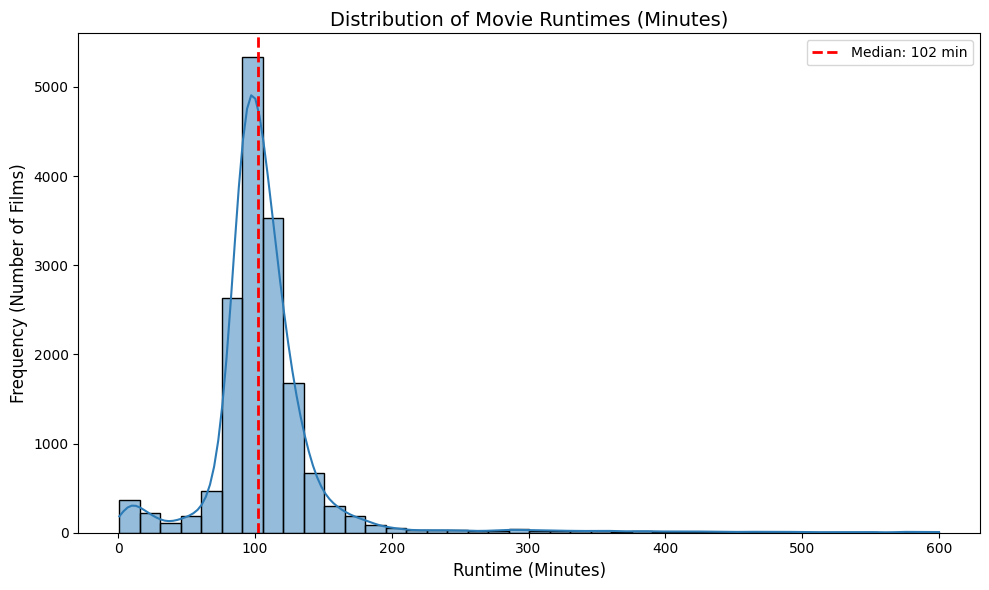

In [10]:
plt.figure(figsize=(10, 6))
# Plot a histogram for the 'runtime' column
# We set bins to 40 for finer detail and include a KDE (density curve)
sns.histplot(df['runtime'], bins=40, kde=True, color='#2c7bb6')
plt.title('Distribution of Movie Runtimes (Minutes)', fontsize=14)
plt.xlabel('Runtime (Minutes)', fontsize=12)
plt.ylabel('Frequency (Number of Films)', fontsize=12)

# Add a vertical line for the median runtime for context
median_runtime = df['runtime'].median()
plt.axvline(median_runtime, color='red', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_runtime:.0f} min')
plt.legend()
plt.tight_layout()
plt.show()

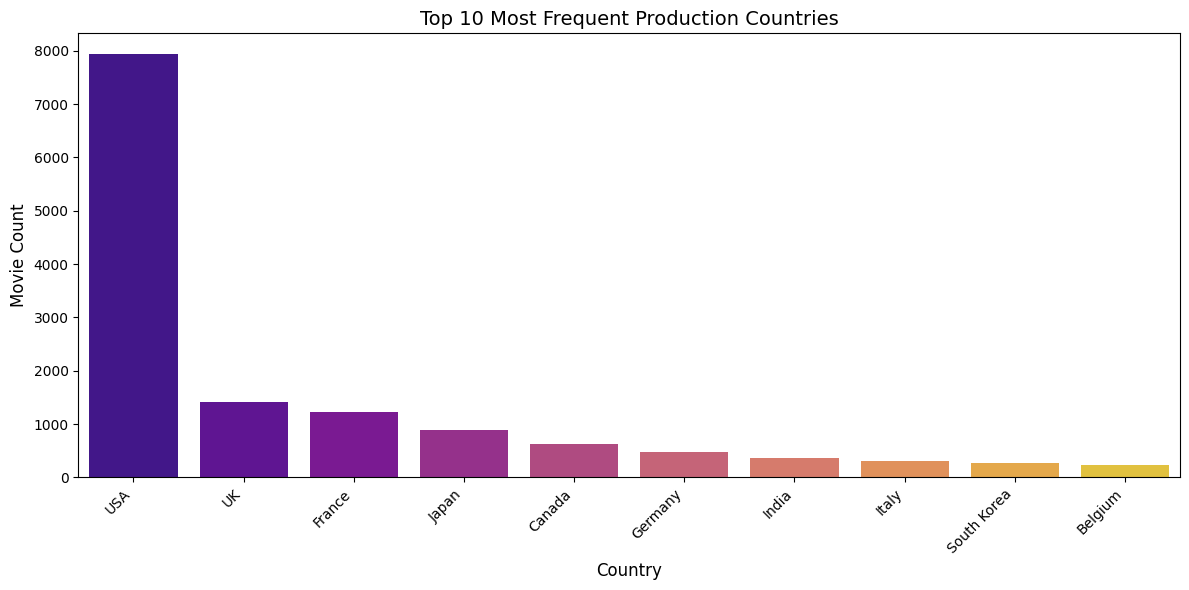

In [11]:
# Calculate the counts for the top 10 countries
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
# Create a bar plot
sns.barplot(x=country_counts.index, y=country_counts.values, palette="plasma")
plt.title('Top 10 Most Frequent Production Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Movie Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

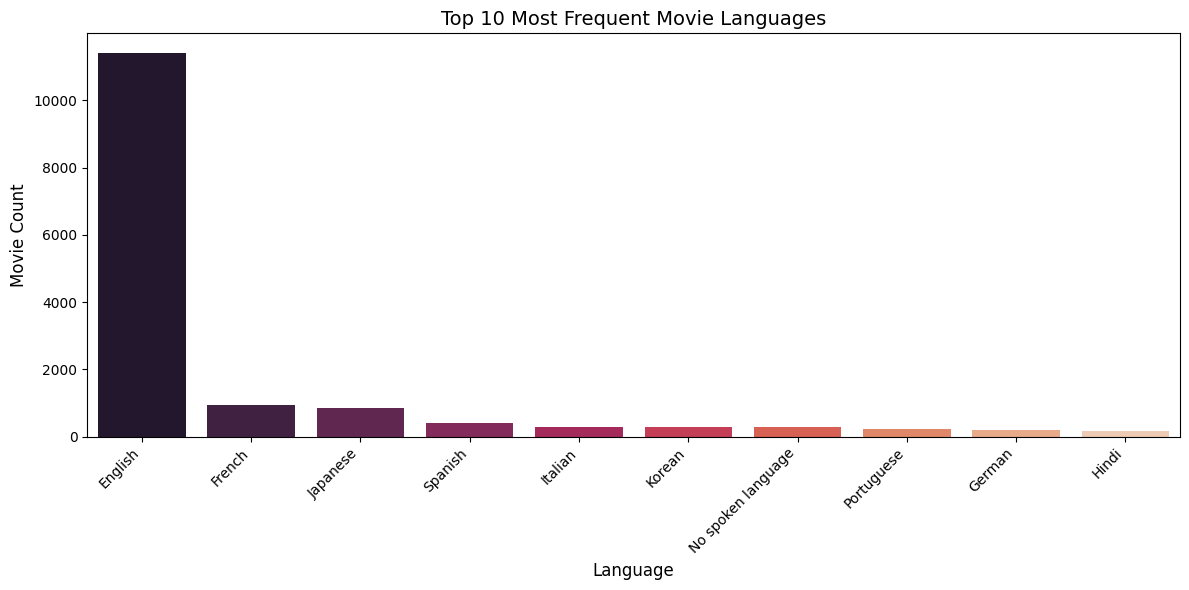

In [12]:
# Calculating the counts for the top 10 languages
language_counts = df['language'].value_counts().head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=language_counts.index, y=language_counts.values, palette="rocket")
plt.title('Top 10 Most Frequent Movie Languages', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Movie Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

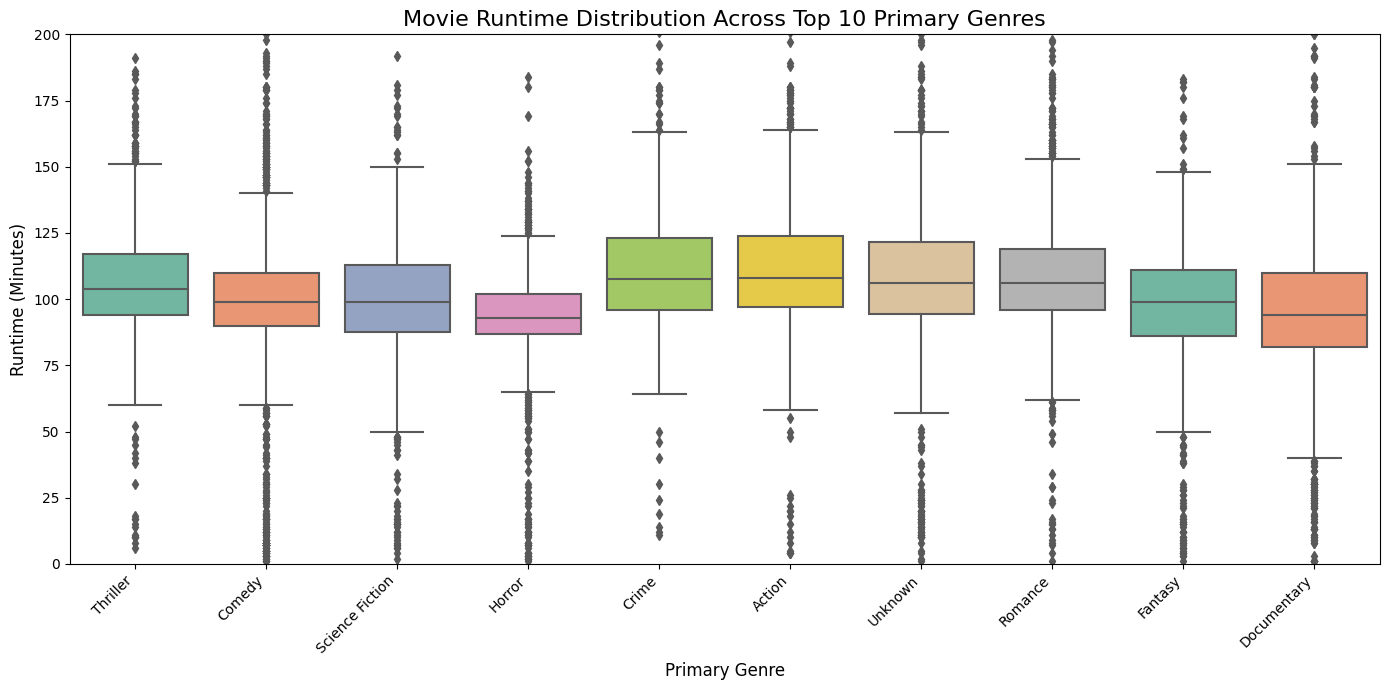

In [13]:
# Identify the top 10 genres
top_10_genres = df['primary_genre'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 genres for visualization
df_top_genres = df[df['primary_genre'].isin(top_10_genres)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='primary_genre', y='runtime', data=df_top_genres, palette="Set2")
plt.title('Movie Runtime Distribution Across Top 10 Primary Genres', fontsize=16)
plt.xlabel('Primary Genre', fontsize=12)
plt.ylabel('Runtime (Minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 200) 
plt.tight_layout()
plt.show()

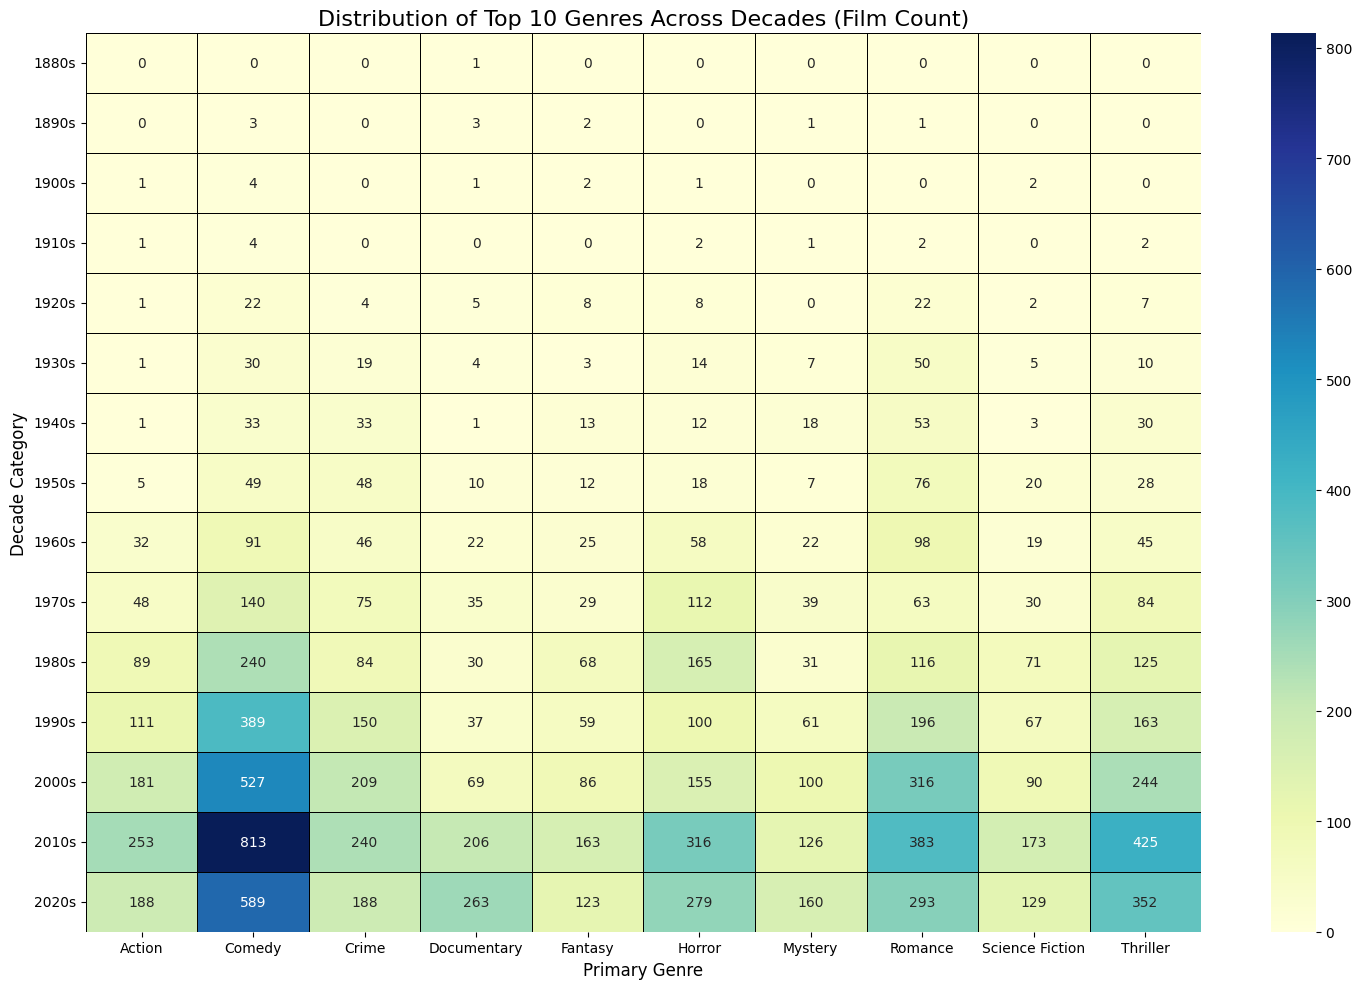

In [14]:
top_10_genres = df['primary_genre'].value_counts().head(11).index.tolist()
if 'Unknown' in top_10_genres:
    top_10_genres.remove('Unknown')
    top_10_genres = top_10_genres[:10] # Take the top 10 after removal

genre_decade_pivot = df[df['primary_genre'].isin(top_10_genres)].pivot_table(
    index='decade_category',
    columns='primary_genre',
    aggfunc='size',
    fill_value=0 # Fill missing decade/genre pairs with 0 films
)

genre_decade_pivot = genre_decade_pivot.sort_index()

# Creating the Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    genre_decade_pivot,
    annot=True, 
    fmt='d',
    cmap='YlGnBu',
    linewidths=.5,
    linecolor='black'
)
plt.title('Distribution of Top 10 Genres Across Decades (Film Count)', fontsize=16)
plt.xlabel('Primary Genre', fontsize=12)
plt.ylabel('Decade Category', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

--- Word Cloud Analysis of Movie Genres ---


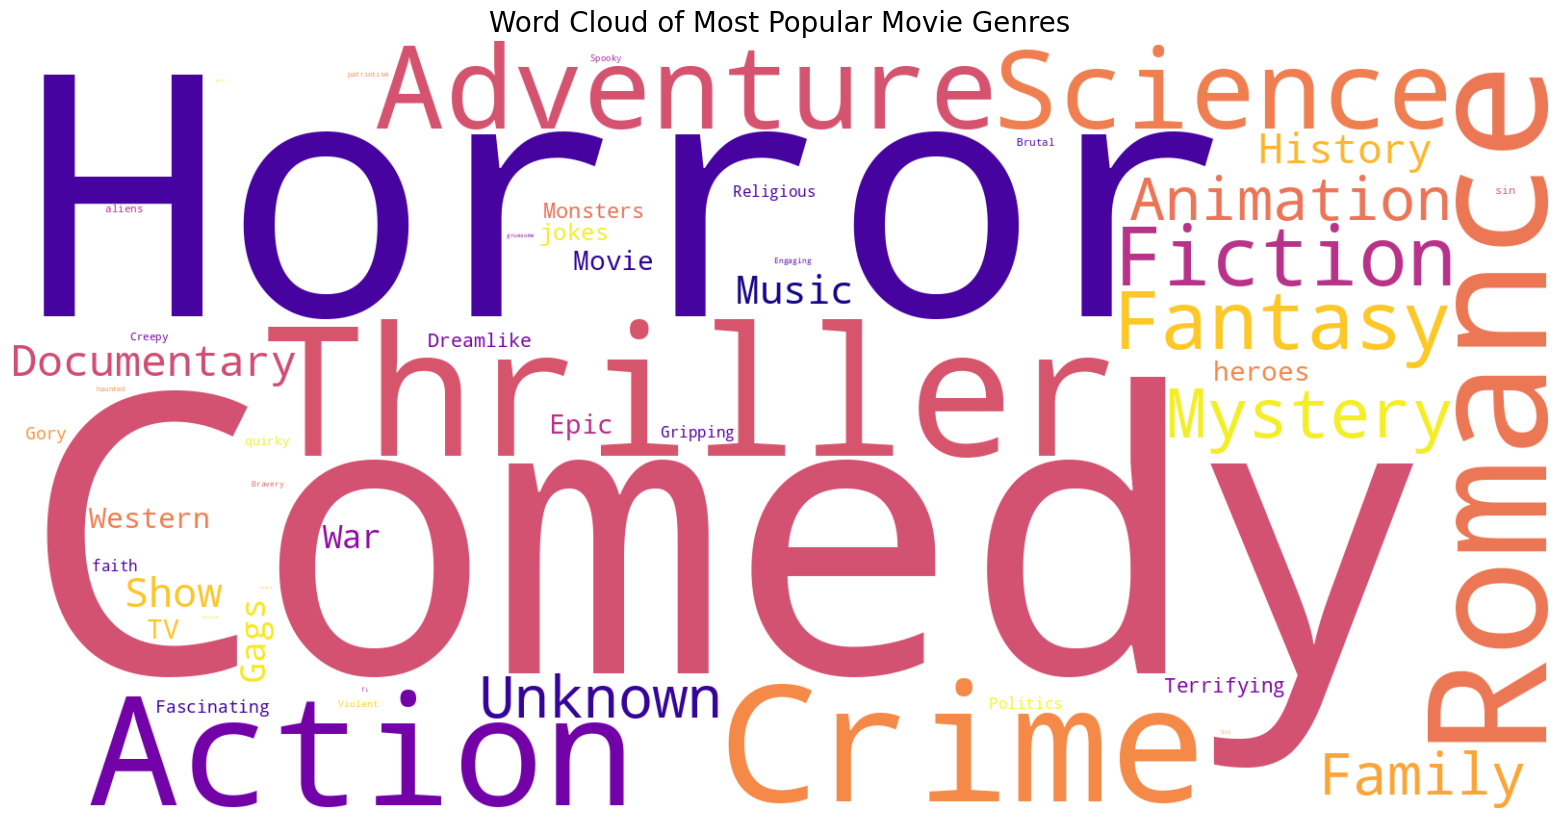

In [15]:
print("--- Word Cloud Analysis of Movie Genres ---")
try:
    text = " ".join(genre.replace(",", " ") for genre in df['genres'].dropna())

    wordcloud = WordCloud(
        stopwords=None,
        background_color="white",
        width=1600,
        height=800,
        colormap='plasma',
        collocations=False  
    ).generate(text)

    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud of Most Popular Movie Genres', fontsize=20)
    plt.show()

except KeyError:
    print("\n\nERROR: A column named 'genres' was not found in the DataFrame.")
except ImportError:
    print("\n\nERROR: The 'wordcloud' library is not installed. Please install it using: pip install wordcloud")
except Exception as e:
    print(f"\n\nAn unexpected error occurred during Word Cloud generation: {e}")

# Runtime-Based Recommender System

In [16]:
try:
    required_columns = ['title', 'runtime']
    
    # 1. Prepare Data
    df_rec_runtime = df[required_columns].dropna().copy()
    df_rec_runtime.reset_index(drop=True, inplace=True)
    
    # Check for non-numeric runtimes (should be clean from EDA, but good to check)
    if not np.issubdtype(df_rec_runtime['runtime'].dtype, np.number):
        print("ERROR: 'runtime' column is not numeric. Cleaning needed.")
        df_rec_runtime['runtime'] = pd.to_numeric(df_rec_runtime['runtime'], errors='coerce')
        df_rec_runtime.dropna(subset=['runtime'], inplace=True)
        df_rec_runtime.reset_index(drop=True, inplace=True)

    print(f"Total {len(df_rec_runtime)} films prepared for the runtime recommender.")

    indices_runtime = pd.Series(df_rec_runtime.index, index=df_rec_runtime['title']).drop_duplicates()
    
except KeyError as e:
    print(f"\n\nERROR: One of the required columns was not found: {e}")
except Exception as e:
    print(f"\n\nAn unexpected error occurred during data preparation: {e}")

Total 16246 films prepared for the runtime recommender.


In [17]:
# Convert runtimes to a NumPy array for fast calculation
runtimes = df_rec_runtime['runtime'].values.reshape(-1, 1)

# Calculate the absolute difference between all runtimes
# matrix_abs_diff[i, j] = |runtime[i] - runtime[j]|
matrix_abs_diff = np.abs(runtimes - runtimes.T)

# Convert difference into a similarity score: 1 / (1 + difference)
# Adding 1 prevents division by zero and ensures that a difference of 0 gives a score of 1.
runtime_sim = 1 / (1 + matrix_abs_diff)

print("Runtime Similarity matrix successfully created.")

Runtime Similarity matrix successfully created.


In [18]:
def get_runtime_recommendations(title, sim_matrix=runtime_sim, indices=indices_runtime):
    """
    Function that returns the top 10 most similar films based on runtime.
    """
    print(f"\n--- Searching for Runtime Recommendations for '{title}' ---")
    try:
        idx = indices[title]
    except KeyError:
        print(f"ERROR: Film named '{title}' was not found in the dataset.")
        return pd.DataFrame() # Return empty DataFrame on error

    # Get the similarity scores for the target movie
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    # Sort the films based on the similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar films (excluding itself, which is sim_scores[0])
    sim_scores = sim_scores[1:11] 
    
    movie_indices = [i[0] for i in sim_scores]
    similarity_values = [i[1] for i in sim_scores]

    # Create a result DataFrame
    recommendation_df = pd.DataFrame({
        'Film Başlığı': df_rec_runtime['title'].iloc[movie_indices],
        'Benzerlik Skoru (Runtime)': similarity_values,
        'Runtime (dk)': df_rec_runtime['runtime'].iloc[movie_indices]
    })
    
    return recommendation_df
    
# Test 1: A popular film (Example Title - replace with a title from your data)
display(get_runtime_recommendations('The Dark Knight')) 

# Test 2: A shorter film (Example Title - replace with a title from your data)
display(get_runtime_recommendations('Spirited Away')) 

# Test 3: A film that might be longer (Example Title - replace with a title from your data)
display(get_runtime_recommendations('The Godfather'))


--- Searching for Runtime Recommendations for 'The Dark Knight' ---


,Film Başlığı,Benzerlik Skoru (Runtime),Runtime (dk)
92,Harry Potter and the Philosopher's Stone,1.0,152.0
311,Star Wars: The Last Jedi,1.0,152.0
568,Suspiria,1.0,152.0
630,Batman v Superman: Dawn of Justice,1.0,152.0
916,Doctor Sleep,1.0,152.0
3592,Ray,1.0,152.0
4224,The Girl with the Dragon Tattoo,1.0,152.0
8372,The Majestic,1.0,152.0
8689,Green Border,1.0,152.0
9355,The Greatest Show on Earth,1.0,152.0



--- Searching for Runtime Recommendations for 'Spirited Away' ---


,Film Başlığı,Benzerlik Skoru (Runtime),Runtime (dk)
401,How to Train Your Dragon,1.0,125.0
524,Ant-Man and the Wasp: Quantumania,1.0,125.0
685,Dog Day Afternoon,1.0,125.0
692,Big Fish,1.0,125.0
709,Emma.,1.0,125.0
741,Monster,1.0,125.0
762,Castle in the Sky,1.0,125.0
779,Bridesmaids,1.0,125.0
825,The Apartment,1.0,125.0
954,Ballerina,1.0,125.0



--- Searching for Runtime Recommendations for 'The Godfather' ---


,Film Başlığı,Benzerlik Skoru (Runtime),Runtime (dk)
6874,A Bridge Too Far,1.0,175.0
10111,Asterix & Obelix: The Big Fight,1.0,175.0
12361,Devara: Part 1,1.0,175.0
14839,Virumaandi,1.0,175.0
15317,Escaping Twin Flames,1.0,175.0
666,The Sound of Music,0.5,174.0
1008,Yi Yi,0.5,174.0
1513,La Dolce Vita,0.5,176.0
4701,O Auto da Compadecida,0.5,174.0
5032,A Star Is Born,0.5,176.0


# Genre-Based Recommender System

In [19]:
try:
    required_columns = ['title', 'genres']
    df_rec_genre = df[required_columns].dropna().copy()
    df_rec_genre.reset_index(drop=True, inplace=True)

    # Genre processing: "Science Fiction" -> "ScienceFiction"
    # This prevents the vectorizer from seeing 'Science' and 'Fiction' as separate features.
    def clean_genres(genres_str):
        # Split by comma, remove leading/trailing spaces, and join multi-word genres by removing internal spaces
        return [genre.strip().replace(" ", "") for genre in genres_str.split(',')]

    processed_genres = df_rec_genre['genres'].apply(clean_genres)
    df_rec_genre['soup'] = processed_genres.apply(lambda x: " ".join(x).lower()) # Convert to lowercase

    # Store the index mapping
    indices_genre = pd.Series(df_rec_genre.index, index=df_rec_genre['title']).drop_duplicates()

    print(f"Total {len(df_rec_genre)} films prepared for the genre recommender.")
    print("\n--- Sample Data (with 'soup' column) ---")
    display(df_rec_genre[['title', 'genres', 'soup']].head())

except KeyError as e:
    print(f"\n\nERROR: One of the required columns was not found: {e}")
    # Exit or handle error if columns are missing
except Exception as e:
    print(f"\n\nAn unexpected error occurred during data preparation: {e}")

Total 16246 films prepared for the genre recommender.

--- Sample Data (with 'soup' column) ---


,title,genres,soup
0,Parasite,"Thriller, Comedy",thriller comedy
1,Barbie,"Comedy, Adventure",comedy adventure
2,Interstellar,"Science Fiction, Adventure, Monsters",sciencefiction adventure monsters
3,Fight Club,"Thriller, Dreamlike",thriller dreamlike
4,La La Land,"Comedy, Music, Romance",comedy music romance


In [20]:
# TF-IDF Vectorization and Cosine Similarity Calculation ---
print("\n--- TF-IDF Vectorization and Cosine Similarity Calculation Initiated... ---")

# Check if data preparation was successful before proceeding
if 'soup' in df_rec_genre.columns:
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df_rec_genre['soup'])
    cosine_sim_genre = cosine_similarity(tfidf_matrix, tfidf_matrix)
    print("Similarity matrix successfully created.")
    print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
else:
    print("Similarity matrix calculation skipped due to data preparation error.")



--- TF-IDF Vectorization and Cosine Similarity Calculation Initiated... ---
Similarity matrix successfully created.
TF-IDF Matrix Shape: (16246, 51)


In [21]:
def get_genre_recommendations(title, sim_matrix=cosine_sim_genre, indices=indices_genre, df_source=df_rec_genre):
    """
    Function that returns the top 10 most similar films based on genre similarity.
    """
    print(f"\n--- Searching for Genre Recommendations for '{title}' ---")
    
    # Error handling for title lookup
    if title not in indices:
        print(f"ERROR: Film named '{title}' was not found in the dataset.")
        return pd.DataFrame()

    idx = indices[title]
    
    # Get the similarity scores for the target movie
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    # Sort the films based on the similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar films (excluding itself)
    sim_scores = sim_scores[1:11] 
    
    movie_indices = [i[0] for i in sim_scores]
    similarity_values = [i[1] for i in sim_scores]

    # Create a result DataFrame
    recommendation_df = pd.DataFrame({
        'Film Başlığı': df_source['title'].iloc[movie_indices],
        'Benzerlik Skoru (Genre)': similarity_values,
        'Genres': df_source['genres'].iloc[movie_indices]
    })
    
    return recommendation_df


print("\n\n#################### TEST RUNS (GENRE) ####################")

# You will need to replace these with actual titles from your dataset
display(get_genre_recommendations('The Dark Knight')) 
display(get_genre_recommendations('Spirited Away')) 
display(get_genre_recommendations('Forrest Gump'))



#################### TEST RUNS (GENRE) ####################

--- Searching for Genre Recommendations for 'The Dark Knight' ---


,Film Başlığı,Benzerlik Skoru (Genre),Genres
190,The Dark Knight Rises,1.0,"Thriller, Crime, Action"
203,John Wick,1.0,"Action, Thriller, Crime"
249,Kill Bill: Vol. 2,1.0,"Thriller, Action, Crime"
406,John Wick: Chapter 4,1.0,"Crime, Action, Thriller"
463,John Wick: Chapter 2,1.0,"Crime, Action, Thriller"
482,Sicario,1.0,"Action, Thriller, Crime"
510,John Wick: Chapter 3 – Parabellum,1.0,"Action, Crime, Thriller"
681,The Fast and the Furious,1.0,"Action, Crime, Thriller"
909,The Fast and the Furious: Tokyo Drift,1.0,"Crime, Action, Thriller"
954,Ballerina,1.0,"Action, Crime, Thriller"



--- Searching for Genre Recommendations for 'Spirited Away' ---


,Film Başlığı,Benzerlik Skoru (Genre),Genres
55,Ratatouille,1.0,"Family, Fantasy, Animation"
136,My Neighbor Totoro,1.0,"Fantasy, Animation, Family"
166,Puss in Boots: The Last Wish,1.0,"Animation, Family, Fantasy"
202,The Nightmare Before Christmas,1.0,"Family, Animation, Fantasy"
252,Flow,1.0,"Family, Fantasy, Animation"
324,Ponyo,1.0,"Animation, Family, Fantasy"
359,Kiki's Delivery Service,1.0,"Fantasy, Animation, Family"
392,Turning Red,1.0,"Family, Fantasy, Animation"
734,The Little Mermaid,1.0,"Family, Animation, Fantasy"
942,Alice in Wonderland,1.0,"Fantasy, Animation, Family"



--- Searching for Genre Recommendations for 'Forrest Gump' ---


,Film Başlığı,Benzerlik Skoru (Genre),Genres
38,Forrest Gump,1.0,"Romance, Comedy"
43,Anora,1.0,"Romance, Comedy"
50,(500) Days of Summer,1.0,"Romance, Comedy"
141,Mamma Mia!,1.0,"Comedy, Romance"
148,Anyone But You,1.0,"Romance, Comedy"
155,Lost in Translation,1.0,"Comedy, Romance"
163,How to Lose a Guy in 10 Days,1.0,"Comedy, Romance"
185,Amélie,1.0,"Romance, Comedy"
189,Clueless,1.0,"Comedy, Romance"
194,Juno,1.0,"Comedy, Romance"


# Category-Based Recommender System

In [22]:
# We will use 'primary_genre' and 'decade_category' as the main filtering categories.
required_cols = ['title', 'year', 'primary_genre', 'decade_category', 'runtime']
df_simple_rec = df[required_cols].copy()

# Ensure categories are strings for easy comparison
df_simple_rec['primary_genre'] = df_simple_rec['primary_genre'].astype(str)
df_simple_rec['decade_category'] = df_simple_rec['decade_category'].astype(str)

print(f"Simple Recommender setup with {len(df_simple_rec)} films.")

Simple Recommender setup with 16246 films.


In [23]:
def get_simple_recommendations(category_col, category_value, top_n=10):
    """
    Function that returns the top N films based purely on matching a category.
    The list is currently ordered by 'year' (most recent first) as a simple 'ranking'.
    """
    print(f"\n--- Searching for films in category '{category_col}' = '{category_value}' ---")
    
    # Error Handling: Check if the category column exists
    if category_col not in df_simple_rec.columns:
        print(f"ERROR: Category column '{category_col}' not found.")
        return pd.DataFrame()

    # Filter the data
    try:
        filtered_df = df_simple_rec[df_simple_rec[category_col] == category_value]
    except Exception as e:
        print(f"ERROR during filtering: {e}")
        return pd.DataFrame()

    if filtered_df.empty:
        print(f"No films found for '{category_value}' in column '{category_col}'.")
        return pd.DataFrame()

    #  Sort (Simple Ranking: Use most recent year as proxy for 'top')
    # If a true rating column was available, we would sort by that instead.
    ranked_results = filtered_df.sort_values(by='year', ascending=False)
    
    #  Return Top N results
    recommendation_df = ranked_results.head(top_n).reset_index(drop=True)
    
    # Display relevant columns
    return recommendation_df[['title', 'primary_genre', 'year', 'runtime']]


print("\n\n#################### TEST RUNS (SIMPLE CATEGORY) ####################")

# Test 1: Top films in the 'Comedy' genre
display(get_simple_recommendations(category_col='primary_genre', category_value='Comedy', top_n=5))

# Test 2: Top films in the 'Thriller' genre
display(get_simple_recommendations(category_col='primary_genre', category_value='Thriller', top_n=5))

# Test 3: Top films from the '1990s' decade
display(get_simple_recommendations(category_col='decade_category', category_value='1990s', top_n=5))



#################### TEST RUNS (SIMPLE CATEGORY) ####################

--- Searching for films in category 'primary_genre' = 'Comedy' ---


,title,primary_genre,year,runtime
0,Ready or Not: Here I Come,Comedy,2026.0,102.0
1,People We Meet on Vacation,Comedy,2026.0,109.0
2,Toy Story 5,Comedy,2026.0,102.0
3,The Devil Wears Prada 2,Comedy,2026.0,102.0
4,Kudumbasthan,Comedy,2025.0,153.0



--- Searching for films in category 'primary_genre' = 'Thriller' ---


,title,primary_genre,year,runtime
0,Peter Pan's Neverland Nightmare,Thriller,2025.0,89.0
1,The Amateur,Thriller,2025.0,123.0
2,Ballad of a Small Player,Thriller,2025.0,101.0
3,Maareesan,Thriller,2025.0,152.0
4,War of the Worlds,Thriller,2025.0,91.0



--- Searching for films in category 'decade_category' = '1990s' ---


,title,primary_genre,year,runtime
0,The Thomas Crown Affair,Crime,1999.0,113.0
1,Universal Soldier: The Return,Science Fiction,1999.0,82.0
2,Tarzan,Family,1999.0,88.0
3,Being John Malkovich,Comedy,1999.0,113.0
4,Resurrection,Crime,1999.0,108.0
